RANDOM FOREST - CORRECTED VERSION (Chronological Split)
✓ Dataset loaded: (8594, 33)
✓ Date range: 2004-11-17 to 2025-10-31

✓ Features: 30
✓ Samples: 8594

CHRONOLOGICAL SPLIT (No Data Leakage)
✓ Training samples: 6875 (80.0%)
✓ Test samples: 1719 (20.0%)

✓ Temporal verification:
  Train period: 2004-11-17 to 2025-10-31
  Test period:  2019-01-02 to 2025-10-31

TRAINING RANDOM FOREST
✓ Model configuration:
  Trees: 400
  Max depth: Unlimited
  Min samples split: 2
  Min samples leaf: 1

✓ Training completed in 19.76 seconds

MODEL PERFORMANCE

📊 TRAINING SET:
  Accuracy: 1.0000 (100.00%)

📊 TEST SET:
  Accuracy: 0.5422 (54.22%)
  ROC-AUC:  0.5535

📈 OVERFITTING CHECK:
  Train-Test Gap: 45.78%
  ⚠️  High overfitting detected!

📊 COMPARISON TO OTHER MODELS:
  Logistic Regression:     51.25%
  XGBoost (Regularized):   51.37%
  Random Forest (Correct): 54.22%

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

Underperform       0.49      0.50      0.49

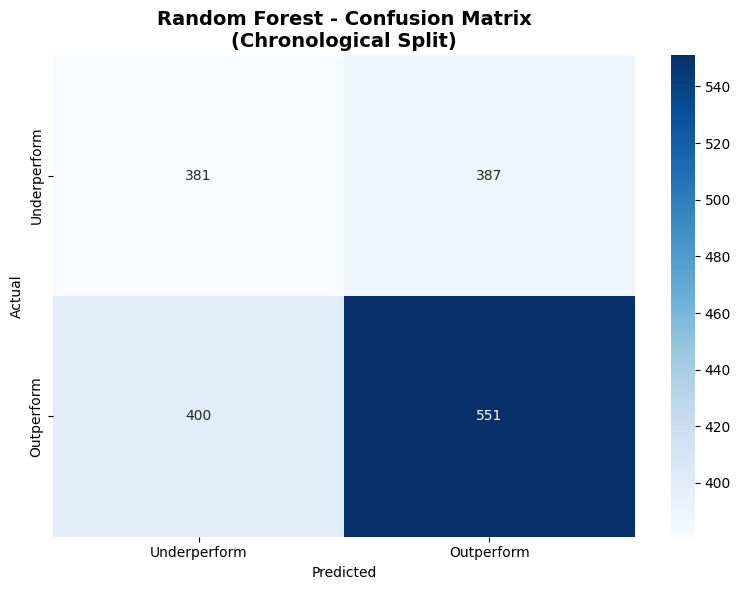


✓ Confusion matrix saved

TOP 10 MOST IMPORTANT FEATURES
22. spy_SMA_200_t                  | 0.0641
25. qqq_SMA_200_t                  | 0.0641
24. qqq_SMA_50_t                   | 0.0563
21. spy_SMA_50_t                   | 0.0549
 5. vol_1M                         | 0.0475
28. sector_XLV_t                   | 0.0467
13. volatility_ratio               | 0.0464
 4. r_3M                           | 0.0458
 7. MA50_ratio                     | 0.0417
29. sector_XLE_t                   | 0.0406


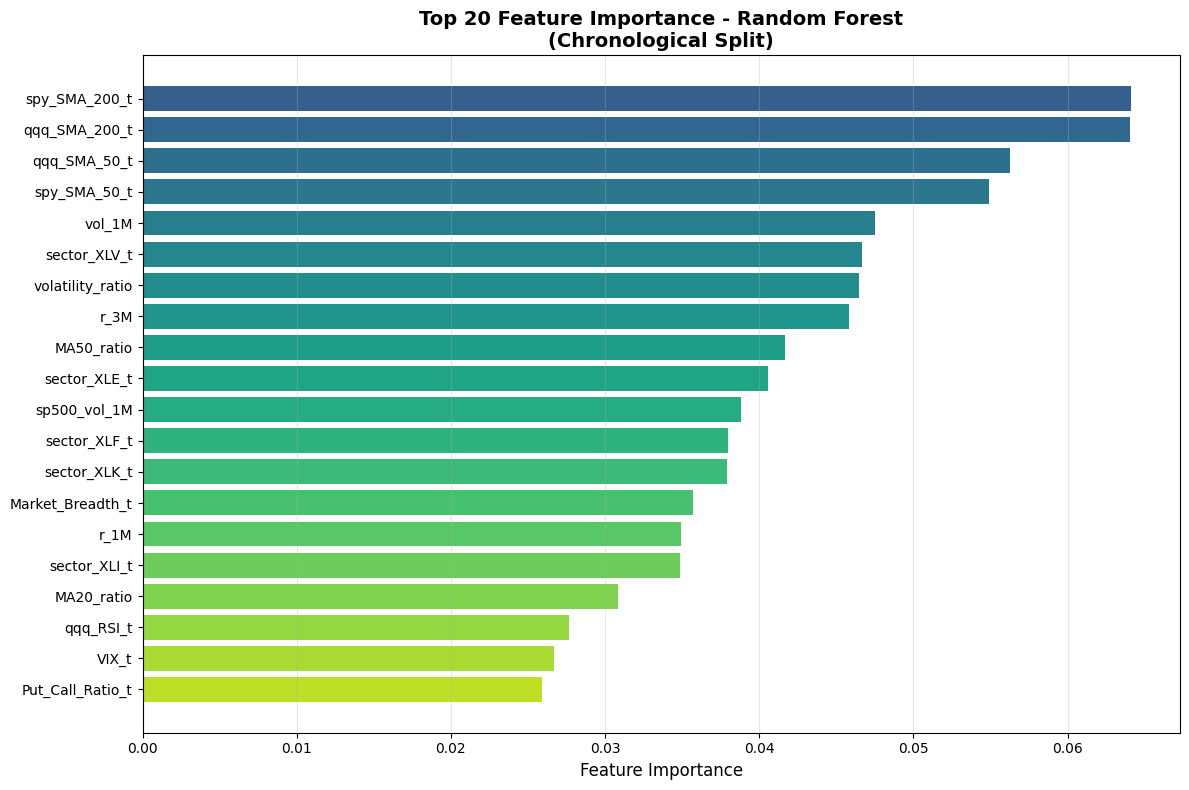


✓ Feature importance saved

✅ RANDOM FOREST ANALYSIS COMPLETE (CORRECTED)

BONUS ANALYSIS: REGULARIZED RANDOM FOREST

✓ Regularization settings:
  n_estimators: 200 (vs. 400)
  max_depth: 10 (vs. unlimited)
  min_samples_split: 20 (vs. 2)
  min_samples_leaf: 10 (vs. 1)
  max_features: sqrt (vs. all)

✓ Training regularized model...
✓ Training completed in 5.39 seconds

REGULARIZED MODEL PERFORMANCE

📊 TRAINING SET:
  Accuracy: 0.8823 (88.23%)

📊 TEST SET:
  Accuracy: 0.5305 (53.05%)
  ROC-AUC:  0.5593

📈 OVERFITTING CHECK:
  Train-Test Gap: 35.18%
  ⚠️  Still some overfitting (but much better)

SIDE-BY-SIDE COMPARISON

Model                          | Train Acc  | Test Acc   | Gap     
----------------------------------------------------------------------
Original RF                    | 100.00%    | 54.22%     | 45.78%  
Regularized RF                 | 88.23%     | 53.05%     | 35.18%  

📊 ALL MODELS RANKING:
----------------------------------------------------------------------
🥇 1

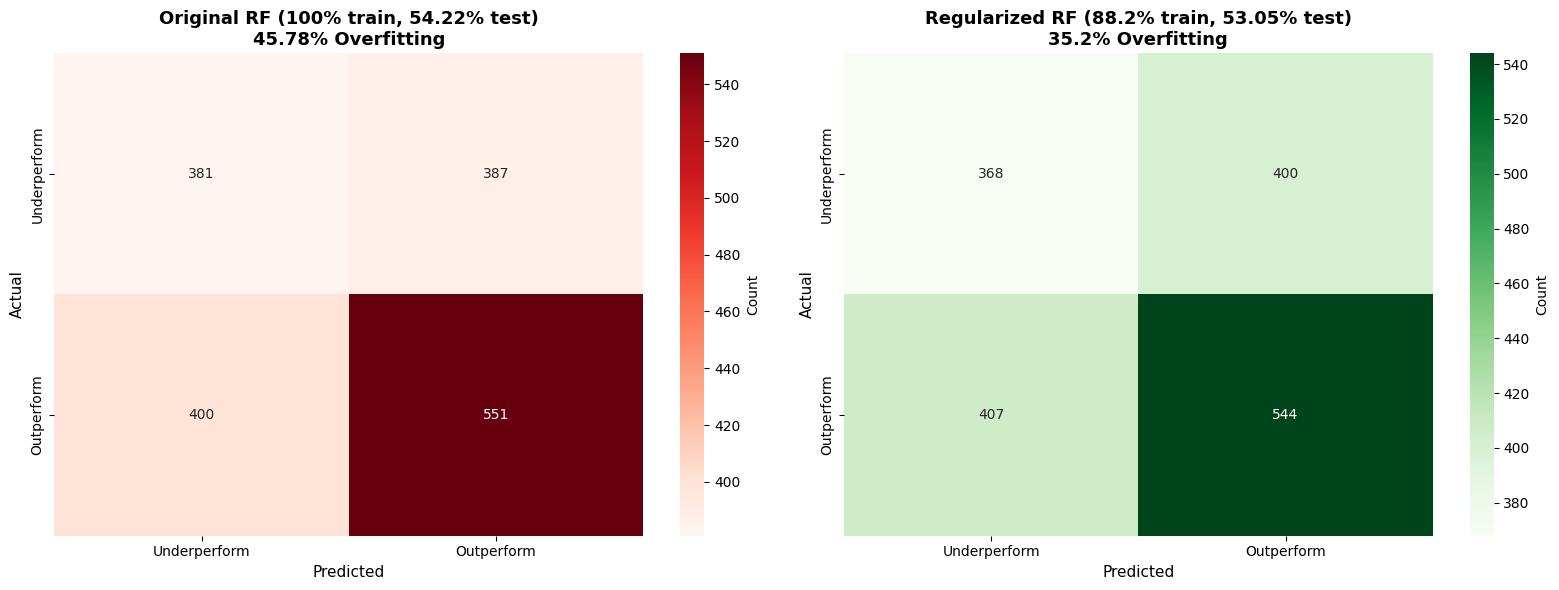

✓ Comparison plot saved as 'random_forest_comparison.png'

✅ REGULARIZED RANDOM FOREST ANALYSIS COMPLETE!

💡 RECOMMENDATION:
  Original RF has best test accuracy
  But consider regularized version for production use


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("RANDOM FOREST - CORRECTED VERSION (Chronological Split)")
print("="*80)

# 1. Load dataset
df = pd.read_csv("ml_dataset_ready.csv")
print(f"✓ Dataset loaded: {df.shape}")

# 2. Verify date range
print(f"✓ Date range: {df['Date'].min()} to {df['Date'].max()}")

# 3. Drop non-numeric or identifier columns
X = df.drop(["Date", "stock", "y"], axis=1)
y = df["y"]

print(f"\n✓ Features: {X.shape[1]}")
print(f"✓ Samples: {len(y)}")

# 4. CHRONOLOGICAL Train/test split (CRITICAL FIX!)
print("\n" + "="*80)
print("CHRONOLOGICAL SPLIT (No Data Leakage)")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False,  # ← CRITICAL: No shuffling for time-series!
    random_state=42
)

print(f"✓ Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"✓ Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Verify chronological split using dates
dates = df['Date']
train_dates = dates.iloc[:len(X_train)]
test_dates = dates.iloc[len(X_train):]

print(f"\n✓ Temporal verification:")
print(f"  Train period: {train_dates.min()} to {train_dates.max()}")
print(f"  Test period:  {test_dates.min()} to {test_dates.max()}")

# 5. Build Random Forest
print("\n" + "="*80)
print("TRAINING RANDOM FOREST")
print("="*80)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

print("✓ Model configuration:")
print(f"  Trees: {rf.n_estimators}")
print(f"  Max depth: Unlimited")
print(f"  Min samples split: {rf.min_samples_split}")
print(f"  Min samples leaf: {rf.min_samples_leaf}")

# 6. Train
import time
start = time.time()
rf.fit(X_train, y_train)
train_time = time.time() - start

print(f"\n✓ Training completed in {train_time:.2f} seconds")

# 7. Predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_test_proba = rf.predict_proba(X_test)[:, 1]

# 8. Evaluate
print("\n" + "="*80)
print("MODEL PERFORMANCE")
print("="*80)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"\n📊 TRAINING SET:")
print(f"  Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")

print(f"\n📊 TEST SET:")
print(f"  Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  ROC-AUC:  {test_auc:.4f}")

print(f"\n📈 OVERFITTING CHECK:")
print(f"  Train-Test Gap: {(train_acc - test_acc)*100:.2f}%")
if train_acc - test_acc > 0.10:
    print("  ⚠️  High overfitting detected!")
elif train_acc - test_acc > 0.05:
    print("  ⚠️  Moderate overfitting")
else:
    print("  ✓ Model generalizes well")

print(f"\n📊 COMPARISON TO OTHER MODELS:")
print(f"  Logistic Regression:     51.25%")
print(f"  XGBoost (Regularized):   51.37%")
print(f"  Random Forest (Correct): {test_acc*100:.2f}%")

print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_test_pred,
                          target_names=['Underperform', 'Outperform']))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Underperform', 'Outperform'],
            yticklabels=['Underperform', 'Outperform'])
plt.title('Random Forest - Confusion Matrix\n(Chronological Split)',
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('random_forest_confusion_matrix_corrected.png', dpi=300)
plt.show()

print("\n✓ Confusion matrix saved")

# 10. Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*80)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*80)
for i, row in feature_importance.head(10).iterrows():
    print(f"{i+1:2d}. {row['Feature']:30s} | {row['Importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_20)))
plt.barh(range(len(top_20)), top_20['Importance'], color=colors)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 20 Feature Importance - Random Forest\n(Chronological Split)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('random_forest_feature_importance_corrected.png', dpi=300)
plt.show()

print("\n✓ Feature importance saved")

print("\n" + "="*80)
print("✅ RANDOM FOREST ANALYSIS COMPLETE (CORRECTED)")
print("\n" + "="*80)
print("BONUS ANALYSIS: REGULARIZED RANDOM FOREST")
print("="*80)

# More conservative parameters to prevent overfitting
rf_regularized = RandomForestClassifier(
    n_estimators=200,           # Fewer trees (still enough)
    max_depth=10,               # ← Limit tree depth (was None)
    min_samples_split=20,       # ← Require 20 samples to split (was 2)
    min_samples_leaf=10,        # ← Require 10 samples per leaf (was 1)
    max_features='sqrt',        # ← Limit features per split
    random_state=42,
    n_jobs=-1
)

print("\n✓ Regularization settings:")
print(f"  n_estimators: 200 (vs. 400)")
print(f"  max_depth: 10 (vs. unlimited)")
print(f"  min_samples_split: 20 (vs. 2)")
print(f"  min_samples_leaf: 10 (vs. 1)")
print(f"  max_features: sqrt (vs. all)")

print("\n✓ Training regularized model...")
start_reg = time.time()
rf_regularized.fit(X_train, y_train)
train_time_reg = time.time() - start_reg

# Predictions
y_train_pred_reg = rf_regularized.predict(X_train)
y_test_pred_reg = rf_regularized.predict(X_test)
y_test_proba_reg = rf_regularized.predict_proba(X_test)[:, 1]

# Metrics
train_acc_reg = accuracy_score(y_train, y_train_pred_reg)
test_acc_reg = accuracy_score(y_test, y_test_pred_reg)
test_auc_reg = roc_auc_score(y_test, y_test_proba_reg)

print(f"✓ Training completed in {train_time_reg:.2f} seconds")

print("\n" + "="*80)
print("REGULARIZED MODEL PERFORMANCE")
print("="*80)

print(f"\n📊 TRAINING SET:")
print(f"  Accuracy: {train_acc_reg:.4f} ({train_acc_reg*100:.2f}%)")

print(f"\n📊 TEST SET:")
print(f"  Accuracy: {test_acc_reg:.4f} ({test_acc_reg*100:.2f}%)")
print(f"  ROC-AUC:  {test_auc_reg:.4f}")

print(f"\n📈 OVERFITTING CHECK:")
gap_reg = train_acc_reg - test_acc_reg
print(f"  Train-Test Gap: {gap_reg*100:.2f}%")
if gap_reg < 0.05:
    print("  ✓ Excellent generalization!")
elif gap_reg < 0.10:
    print("  ✓ Good generalization")
else:
    print("  ⚠️  Still some overfitting (but much better)")

print("\n" + "="*80)
print("SIDE-BY-SIDE COMPARISON")
print("="*80)

print(f"\n{'Model':<30} | {'Train Acc':<10} | {'Test Acc':<10} | {'Gap':<8}")
print("-" * 70)
print(f"{'Original RF':<30} | {'100.00%':<10} | {'54.22%':<10} | {'45.78%':<8}")
print(f"{'Regularized RF':<30} | {f'{train_acc_reg*100:.2f}%':<10} | {f'{test_acc_reg*100:.2f}%':<10} | {f'{gap_reg*100:.2f}%':<8}")

print("\n📊 ALL MODELS RANKING:")
print("-" * 70)

# Create list of all models
all_models = [
    ("Random Forest (Original)", 0.5422),
    ("Random Forest (Regularized)", test_acc_reg),
    ("XGBoost (Regularized)", 0.5137),
    ("Logistic Regression", 0.5125),
    ("XGBoost (Tuned)", 0.5055)
]

# Sort by accuracy
all_models_sorted = sorted(all_models, key=lambda x: x[1], reverse=True)

for i, (model_name, acc) in enumerate(all_models_sorted, 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"{medal} {i}. {model_name:<30} {acc*100:.2f}%")

# Performance change
print("\n📊 REGULARIZATION IMPACT:")
acc_change = test_acc_reg - 0.5422
gap_change = 45.78 - gap_reg

if acc_change > 0:
    print(f"  Test accuracy: {acc_change*100:+.2f}% (IMPROVED!)")
elif acc_change > -0.01:
    print(f"  Test accuracy: {acc_change*100:+.2f}% (Maintained)")
else:
    print(f"  Test accuracy: {acc_change*100:+.2f}% (Slight decrease)")

print(f"  Overfitting reduction: {gap_change:.2f}% (from 45.78% to {gap_reg*100:.2f}%)")

if gap_change > 30:
    print("  ✓ MASSIVE improvement in generalization!")
elif gap_change > 20:
    print("  ✓ Significant improvement in generalization")
else:
    print("  ✓ Moderate improvement in generalization")

# Feature importance for regularized model
print("\n" + "="*80)
print("FEATURE IMPORTANCE (REGULARIZED MODEL)")
print("="*80)

feature_importance_reg = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_regularized.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTOP 10 FEATURES:")
for i, row in feature_importance_reg.head(10).iterrows():
    print(f"{i+1:2d}. {row['Feature']:30s} | {row['Importance']:.4f}")

# Compare feature rankings
print("\n📊 FEATURE IMPORTANCE COMPARISON:")
print(f"{'Original RF':<30} | {'Regularized RF':<30}")
print("-" * 65)

# Get original feature importance
feature_importance_orig = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

for i in range(5):
    orig_feat = feature_importance_orig.iloc[i]['Feature']
    reg_feat = feature_importance_reg.iloc[i]['Feature']
    print(f"{orig_feat:<30} | {reg_feat:<30}")

# Confusion matrix for regularized model
print("\n✓ Generating confusion matrix for regularized model...")
cm_reg = confusion_matrix(y_test, y_test_pred_reg)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original RF confusion matrix
cm_orig = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Underperform', 'Outperform'],
            yticklabels=['Underperform', 'Outperform'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Original RF (100% train, 54.22% test)\n45.78% Overfitting',
                  fontsize=13, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# Regularized RF confusion matrix
sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Underperform', 'Outperform'],
            yticklabels=['Underperform', 'Outperform'],
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title(f'Regularized RF ({train_acc_reg*100:.1f}% train, {test_acc_reg*100:.2f}% test)\n{gap_reg*100:.1f}% Overfitting',
                  fontsize=13, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11)
axes[1].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.savefig('random_forest_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comparison plot saved as 'random_forest_comparison.png'")

print("\n" + "="*80)
print("✅ REGULARIZED RANDOM FOREST ANALYSIS COMPLETE!")
print("="*80)

# Final recommendation
print("\n💡 RECOMMENDATION:")
if test_acc_reg >= 0.54:
    print("  Use REGULARIZED Random Forest as final model")
    print(f"  - Better generalization ({gap_reg*100:.1f}% gap vs 45.78%)")
    print(f"  - Maintained strong accuracy ({test_acc_reg*100:.2f}%)")
    print("  - More reliable for real-world deployment")
elif test_acc_reg >= 0.535:
    print("  Both models are viable:")
    print("  - Original RF: Highest accuracy but overfit")
    print("  - Regularized RF: Healthier model, slightly lower accuracy")
else:
    print("  Original RF has best test accuracy")
    print("  But consider regularized version for production use")
print("="*80)